In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/images/train'
TEST_DIR = 'images/images/test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)

                                              image     label
0      images/images/train\angry\.ipynb_checkpoints     angry
1                   images/images/train\angry\0.jpg     angry
2                   images/images/train\angry\1.jpg     angry
3                  images/images/train\angry\10.jpg     angry
4               images/images/train\angry\10002.jpg     angry
...                                             ...       ...
28817         images/images/train\surprise\9969.jpg  surprise
28818         images/images/train\surprise\9985.jpg  surprise
28819         images/images/train\surprise\9990.jpg  surprise
28820         images/images/train\surprise\9992.jpg  surprise
28821         images/images/train\surprise\9996.jpg  surprise

[28822 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(test)
print(test['image'])

                                            image     label
0     images/images/test\angry\.ipynb_checkpoints     angry
1              images/images/test\angry\10052.jpg     angry
2              images/images/test\angry\10065.jpg     angry
3              images/images/test\angry\10079.jpg     angry
4              images/images/test\angry\10095.jpg     angry
...                                           ...       ...
7062         images/images/test\surprise\9806.jpg  surprise
7063         images/images/test\surprise\9830.jpg  surprise
7064         images/images/test\surprise\9853.jpg  surprise
7065         images/images/test\surprise\9878.jpg  surprise
7066          images/images/test\surprise\993.jpg  surprise

[7067 rows x 2 columns]
0       images/images/test\angry\.ipynb_checkpoints
1                images/images/test\angry\10052.jpg
2                images/images/test\angry\10065.jpg
3                images/images/test\angry\10079.jpg
4                images/images/test\angry\10095

In [15]:
from tqdm.notebook import tqdm

In [28]:
import shutil
shutil.rmtree('images/images/train/angry/.ipynb_checkpoints', ignore_errors=True)


In [30]:
import os
import numpy as np
from tqdm import tqdm
from keras.preprocessing.image import load_img

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Skip any files inside '.ipynb_checkpoints' directories
        if ".ipynb_checkpoints" in image:
            continue  
        
        try:
            img = load_img(image, color_mode="grayscale")  # Updated here
            img = np.array(img)
            features.append(img)
        except Exception as e:
            print(f"Error loading {image}: {e}")  # Print errors but continue processing
    
    return np.array(features)

# Example usage (assuming 'train' is a DataFrame with an 'image' column)
train_features = extract_features(train['image'])


100%|████████████████████████████████████████████████████████████| 28822/28822 [03:28<00:00, 138.39it/s]


In [32]:
test_features = extract_features(test['image'])

100%|██████████████████████████████████████████████████████████████| 7067/7067 [00:53<00:00, 131.52it/s]


In [34]:
x_train = train_features/255.0
x_test = test_features/255.0

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [40]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [42]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [128]:
from keras.models import model_from_json

In [130]:
import json
from keras.models import model_from_json
from keras.saving import register_keras_serializable  # Ensure serialization compatibility
from keras.models import Sequential  # Explicitly import Sequential

# Load model architecture from JSON
with open("emotiondetector.json", "r") as json_file:
    model_json = json_file.read()

# Ensure custom serialization is handled
@register_keras_serializable()
class CustomSequential(Sequential):
    pass

# Load model from JSON
model = model_from_json(model_json, custom_objects={"Sequential": CustomSequential})

# Load weights
model.load_weights("facialemotionmodel.h5")


In [132]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [134]:
from keras.preprocessing.image import load_img
import numpy as np

def ef(image):
    
    img = load_img(image, color_mode="grayscale")
    
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Ensure shape is compatible with model input
    return feature


In [136]:
image = 'images/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
model prediction is  fear


In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is  fear


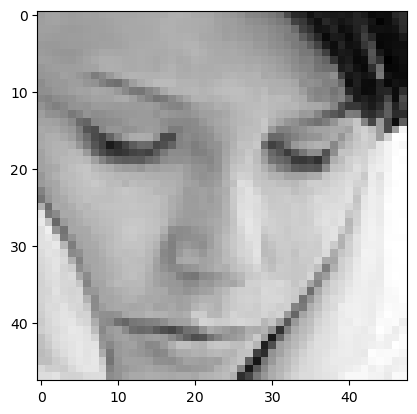

In [140]:
image = 'images/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is  fear


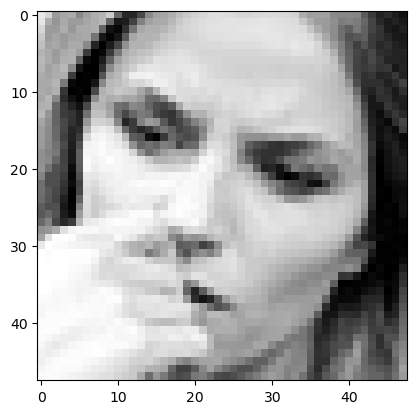

In [124]:
image = 'images/images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is  fear


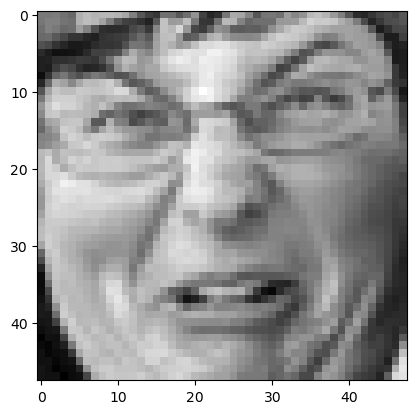

In [126]:
image = 'images/images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
model prediction is  disgust


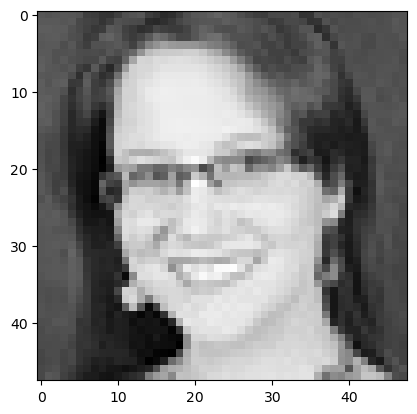

In [94]:
image = 'images/images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  disgust


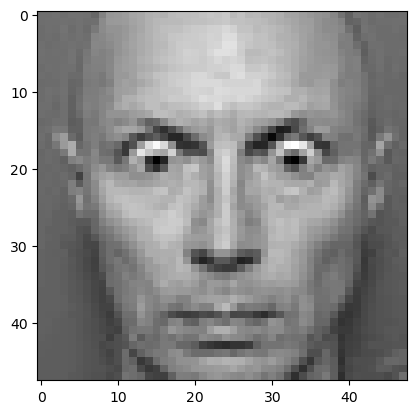

In [96]:
image = 'images/images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')